In [5]:
import pandas as pd

# Load the data from CSV file
file_path = 'final_zillow_data1.csv'  
df = pd.read_csv(file_path)

# Selected quantitative features
quantitative_features = ['Value', 'SizeRank', 'RegionID']

# Computing min, max, and median for each quantitative feature
for feature in quantitative_features:
    print(f"Feature: {feature}")
    print(f"Min: {df[feature].min()}")
    print(f"Max: {df[feature].max()}")
    print(f"Median: {df[feature].median()}")
    print("-" * 40)

# Selected qualitative feature
qualitative_feature = 'StateName'

# Computing number of categories, most frequent category, and least frequent category for the qualitative feature
print(f"Qualitative Feature: {qualitative_feature}")
categories = df[qualitative_feature].value_counts()
print(f"Number of Categories: {categories.count()}")

most_frequent = categories[categories == categories.max()]
print("Most Frequent Category:")
print(most_frequent)

least_frequent = categories[categories == categories.min()]
print("\nLeast Frequent Category:")
print(least_frequent)

with open('data_processed/summary.txt', 'w') as file:
    for feature in quantitative_features:
        file.write(f"\nFeature: {feature}\n")
        file.write(f"Min: {df[feature].min()}\n")
        file.write(f"Max: {df[feature].max()}\n")
        file.write(f"Median: {df[feature].median()}\n")
        file.write("-" * 40)
    file.write(f"\nQualitative Feature: {qualitative_feature}\n")
    file.write(f"Number of Categories: {categories.count()}\n")
    file.write("Most Frequent Category:\n")
    file.write(most_frequent.to_string())
    file.write("\nLeast Frequent Category:\n")
    file.write(least_frequent.to_string())

Feature: Value
Min: 3400.386357053731
Max: 16844312.708684005
Median: 220035.72351282107
----------------------------------------
Feature: SizeRank
Min: 0
Max: 27095
Median: 9595.0
----------------------------------------
Feature: RegionID
Min: 3324
Max: 832002
Median: 394792.0
----------------------------------------
Qualitative Feature: StateName
Number of Categories: 51
Most Frequent Category:
TX    777164
Name: StateName, dtype: int64

Least Frequent Category:
HI    3806
Name: StateName, dtype: int64


In [7]:
# Creating a correlation matrix
corr_matrix = df[quantitative_features].corr()

# Printing the lower triangle of the correlation matrix
for i in range(len(quantitative_features)):
    for j in range(i+1):
        print(f"Correlation between {quantitative_features[i]} and {quantitative_features[j]}: {corr_matrix.iloc[i, j]:.2f}")

        
with open('data_processed/correlation.txt', 'w') as file:
    for i in range(len(quantitative_features)):
        for j in range(i+1):
            file.write(f"Correlation between {quantitative_features[i]} and {quantitative_features[j]}: {corr_matrix.iloc[i, j]:.2f}\n")



Correlation between Value and Value: 1.00
Correlation between SizeRank and Value: 0.05
Correlation between SizeRank and SizeRank: 1.00
Correlation between RegionID and Value: 0.02
Correlation between RegionID and SizeRank: 0.29
Correlation between RegionID and RegionID: 1.00


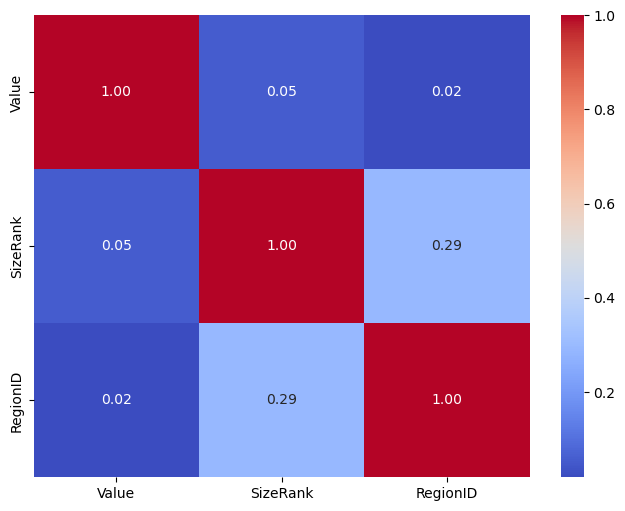

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            xticklabels=quantitative_features, 
            yticklabels=quantitative_features)
plt.savefig('visuals/heatmap.png')
plt.show()


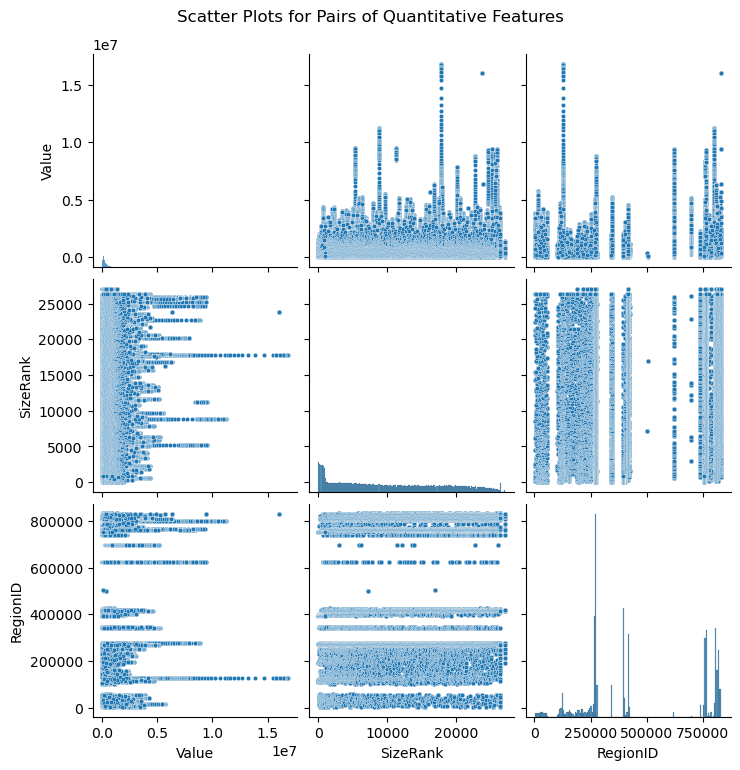

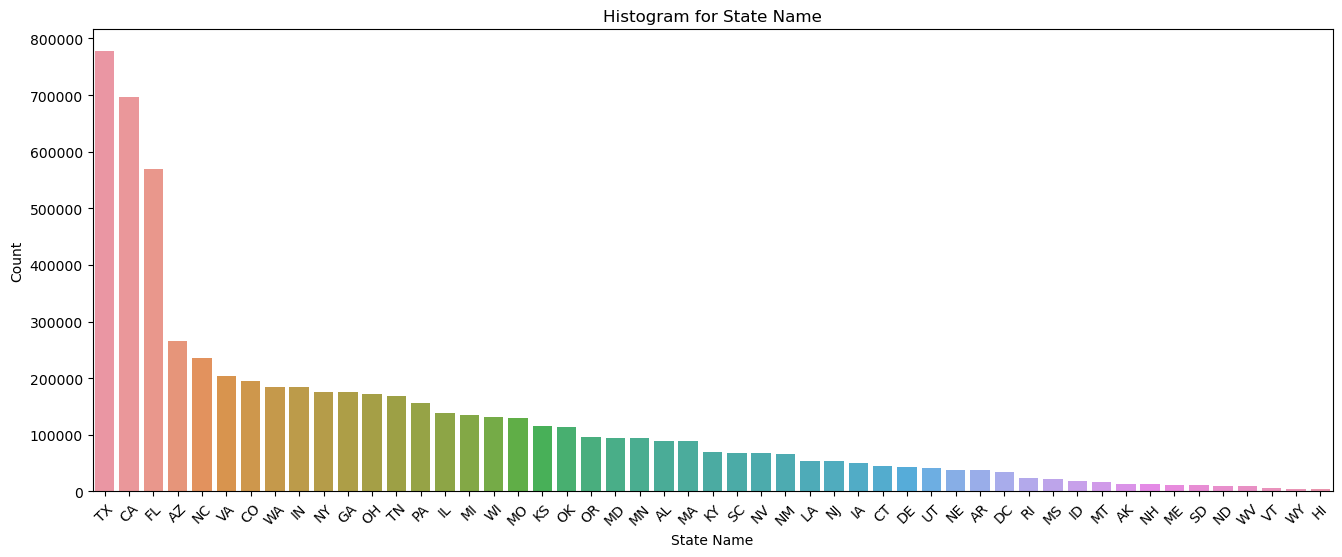

In [10]:
# Selected quantitative features
quantitative_features = ['Value', 'SizeRank', 'RegionID']

# Creating scatter plots for all pairs of quantitative features with adjusted marker size
sns.pairplot(df[quantitative_features], plot_kws={'s': 10}) 
plt.suptitle('Scatter Plots for Pairs of Quantitative Features', y=1.02) 
plt.savefig('visuals/scatterplot.png')
plt.show()

# Selected qualitative feature
qualitative_feature = 'StateName'

# Creating a histogram for the qualitative feature
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x=qualitative_feature, order=df[qualitative_feature].value_counts().index)
plt.title('Histogram for State Name')
plt.xlabel('State Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('visuals/histogram.png')
plt.show()
